<a href="https://colab.research.google.com/github/stefkong1982/netology.ru/blob/Master/%D0%A1%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B0%20%D0%B2%20Python/%D0%92%D0%B8%D0%B7%D1%83%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F%20%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85/%D0%94%D0%97_%D0%9A%D0%BE%D0%BD%D0%B4%D1%80%D0%B0%D1%82%D1%8C%D0%B5%D0%B2_STPY-48_%D0%BA%20%D0%BB%D0%B5%D0%BA%D1%86%D0%B8%D0%B8%20%D0%92%D0%B8%D0%B7%D1%83%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F%20%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание к лекции "Визуализация данных"

## Обязательная часть

Вам необходимо провести базовый [EDA](https://en.wikipedia.org/wiki/Exploratory_data_analysis) выбранного набора данных.

Требования к анализу:
- построить не менее 4 визуализаций различных видов;
- каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
- по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

**Откуда брать данные?**

Можете взять свои рабочие данные, либо найти открытые данные (например, на [kaggle.com](https://www.kaggle.com/)) по интересующей вас предметной области (тогда не забудьте приложить ссылку на данные). Если идей нет, можете взять один из перечисленных ниже:
- [данные приложений из Google Play](https://www.kaggle.com/lava18/google-play-store-apps);
- [данные о видео из трендов YouTube](https://www.kaggle.com/datasnaek/youtube-new);
- [данные об уровне счастья в разных странах](https://www.kaggle.com/unsdsn/world-happiness).


### Дополнительная часть (необязательная)

* построить дополнительно не менее 2 визуализаций (итого не менее 6);
* в работе должны присутствовать следующие визуализации: boxplot, heatmap, scatter plot matrix;


Для выполнения домашнего задания будем анализировать и визуализировать набор данных [titanic.csv](https://clck.ru/36dru6) о пассажирах `Титаника`

Столбцы набора данных:

* 0: `Survived` - (Не выживший (0) / Выживший (1))
* 1: `Pclass` - (1-класс, 2-класс, 3-класс)
* 2: `Name` - (Имя)
* 3: `Sex` - (Пол: male- Мужской, female - Женский)
* 4: `Age` - (Возраст)
* 5: `Siblings/Spouses Aboard` - (братья и сестры/супруги на борту)
* 6: `Parents/Children Aboard` - (Родители/Дети на борту)
* 7: `Fare` - (Стоимость билета)

С помощтю визуализаций будем выдвигать следующие гипотезы:



1.   Выживаемость пассажиров зависела от класса, в котором они находились
2.   Женщины имели более высокий процент выживаемости в каждом из трех классов



In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Импорт библиотек

In [73]:
data = pd.read_csv('titanic.csv')
# Загружаем данные

In [ ]:
data
# Смитрим наш дата фрейм

In [ ]:
data.info()
# Смотрим информацию

In [ ]:
(data.isna().mean() * 100).round(2)
# Проверяем пустые значения

## Первичное изучение данных

### Анализ категориальных столбцов

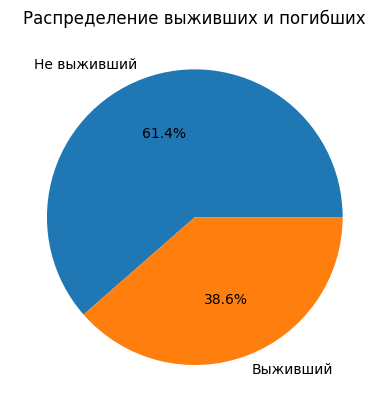

Количество выживших (1) и погибших (0):


0    545
1    342
Name: Survived, dtype: int64

In [77]:
# Рассчитываем количество выживших и погибших
survived_count = data['Survived'].value_counts()

# Построение круговой диаграммы
plt.pie(survived_count, labels=['Не выживший', 'Выживший'], autopct='%1.1f%%')
plt.title("Распределение выживших и погибших")
plt.show()
print("Количество выживших (1) и погибших (0):")
survived_count

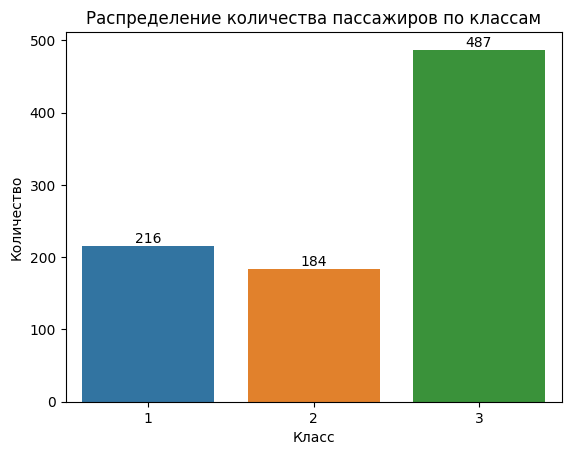

In [78]:
# Построение графика распределения количества пассажиров по классам
sns.countplot(x='Pclass', data=data)
plt.title("Распределение количества пассажиров по классам")
plt.xlabel("Класс")
plt.ylabel("Количество")

# Подсчет значений по столбцу "Pclass"
class_counts = data['Pclass'].value_counts()
for i, count in enumerate(class_counts.sort_index()):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

### Гипотеза №1 -  Выживаемость пассажиров зависела от класса, в котором они находились

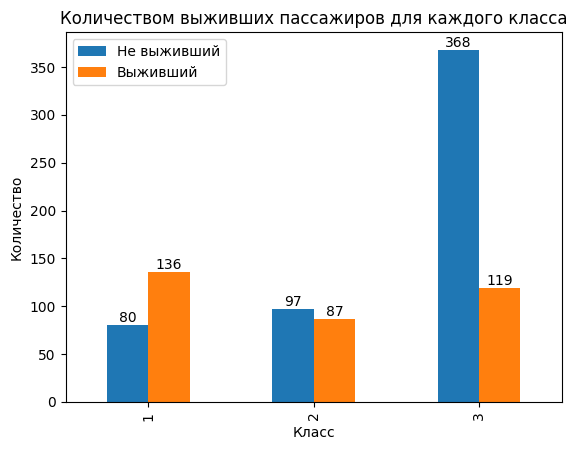

Процент выживших в 1-м классе: 62.962963%
Процент выживших в 2-м классе: 47.282609%
Процент выживших в 3-м классе: 24.435318%


In [88]:
# Группируем данные по классу (Pclass) и выживаемости (Survived) и считаем количество пассажиров
class_survived = data.groupby(['Pclass', 'Survived']).size().unstack()

# Строим график
ax = class_survived.plot(kind='bar')
plt.title('Количеством выживших пассажиров для каждого класса')
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.legend(['Не выживший', 'Выживший'])

# Добавление числовых подписей над каждым столбцом
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, height, ha='center', va='bottom')

plt.show()

# Расчет процента выживших в каждом классе
class_survival_percentages = class_survived[1] / (class_survived[0] + class_survived[1]) * 100

# Вывод процентов выживших по классам
for pclass, percentage in class_survival_percentages.items():
    print(f"Процент выживших в {pclass}-м классе: {percentage:2f}%")

По результатам анализа, можно сделать следующие выводы:

1. Процент выживших в каждом классе:
   - В 1-м классе примерно 62.96% пассажиров выжили.
   - Во 2-м классе примерно 47.28% пассажиров выжили.
   - В 3-м классе примерно 24.39% пассажиров выжили.

2. Вероятно, выживаемость пассажиров зависела от класса, в котором они находились. Пассажиры в 1-м классе имели лучшие шансы на выживание, в то время как пассажиры в 3-м классе имели наименьшие шансы на выживание.

3. Причины, по которым процент выживших различается в зависимости от класса, могут включать различия в доступе к спасательным средствам, расположение кают на корабле и возможную приоритетность высшего класса при эвакуации.

### Гипотеза №2 - Женщины имели более высокий процент выживаемости в каждом из трех классов

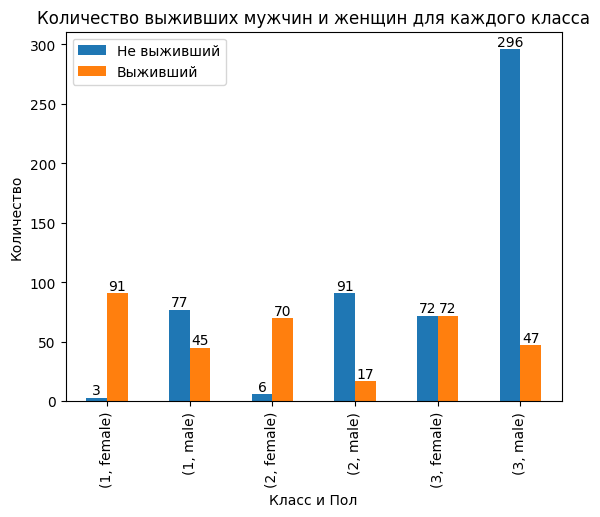

Процент выживших female в 1-м классе: 96.808511%
Процент выживших male в 1-м классе: 36.885246%
Процент выживших female в 2-м классе: 92.105263%
Процент выживших male в 2-м классе: 15.740741%
Процент выживших female в 3-м классе: 50.000000%
Процент выживших male в 3-м классе: 13.702624%


In [87]:
# Группируем данные по классу (Pclass), полу (Sex) и выживаемости (Survived) и считаем количество пассажиров
gender_class_survived = data.groupby(['Pclass', 'Sex', 'Survived']).size().unstack()

# Строим график
ax = gender_class_survived.plot(kind='bar')
plt.title('Количество выживших мужчин и женщин для каждого класса')
plt.xlabel('Класс и Пол')
plt.ylabel('Количество')
plt.legend(['Не выживший', 'Выживший'])

# Добавление числовых подписей над каждым столбцом
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, height, ha='center', va='bottom')

plt.show()

# Расчет процента выживших по классу и полу
total_passengers = gender_class_survived.sum(axis=1)
survival_percentages = gender_class_survived[1] / total_passengers * 100

# Вывод процентов выживших по классу и полу
for idx, percentage in survival_percentages.items():
    pclass, sex = idx
    print(f"Процент выживших {sex} в {pclass}-м классе: {percentage:2f}%")

По результатам анализа, можно сделать следующие выводы:

1. Общая выживаемость по классу и полу:
   - В первом классе выжило 91 женщина из 94 (около 97%), а также 45 мужчин из 122 (около 37%).
   - Во втором классе выжило 70 женщин из 76 (около 92%), а также 17 мужчин из 108 (около 16%).
   - В третьем классе выжило 72 женщины из 144 (около 50%), а также 47 мужчин из 343 (около 14%).
   
2. Сравнение выживаемости мужчин и женщин:
   - В целом, наблюдается явная разница в выживаемости между мужчинами и женщинами.
   - Женщины имели более высокий процент выживаемости в каждом из трех классов. Например, в первом классе женщин выжило около 97%, тогда как процент выживаемости мужчин составил всего около 37%.
   - Эта разница в выживаемости может быть связана с приоритетным эвакуацией женщин и детей во время катастрофы.


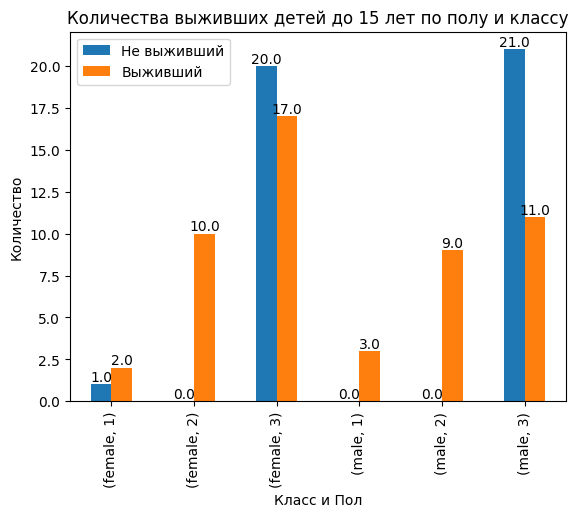

In [84]:
# Фильтруем данные для выборки только детей до 15 лет
child_data = data[data['Age'] <= 15]

# Группируем данные по полу (Sex), классу (Pclass) и выживаемости (Survived) и считаем количество пассажиров
child_survived = child_data.groupby(['Sex', 'Pclass', 'Survived']).size().unstack()

# Строим график
ax = child_survived.plot(kind='bar')
plt.title('Количества выживших детей до 15 лет по полу и классу')
plt.xlabel('Класс и Пол')
plt.ylabel('Количество')
plt.legend(['Не выживший', 'Выживший'])

# Добавляем числовые подписи над каждым столбцом
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

In [ ]:
# Фильтруем данные для выборки только детей до 3 лет
child_data = data[data['Age'] <= 3]

# Группируем данные по полу (Sex), классу (Pclass) и выживаемости (Survived) и считаем количество пассажиров
child_survived = child_data.groupby(['Sex', 'Pclass', 'Survived']).size().unstack()

# Строим график
ax = child_survived.plot(kind='bar')
plt.title('Количества выживших детей до 3 лет по полу и классу')
plt.xlabel('Класс и Пол')
plt.ylabel('Количество')
plt.legend(['Не выживший', 'Выживший'])

# Добавляем числовые подписи над каждым столбцом
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

## Анализ непрерывных величин

In [ ]:
# Нахождение базовых статистик для столбца "Возраст"
age_stats = data['Age'].describe()
print("Статистика для столбца 'Возраст':\n", age_stats)

In [ ]:
# Построение гистограммы возраста
sns.histplot(data['Age'], kde=True)
plt.title("Распределение возраста пассажиров")
plt.xlabel("Возраст")
plt.ylabel("Количество")
plt.show()

# Построение диаграммы размаха возраста
sns.boxplot(x=data['Age'])
plt.title("Диаграмма размаха возраста пассажиров")
plt.xlabel("Возраст")
plt.show()


In [ ]:
# Нахождение базовых статистик для столбца "Стоимость билета"
fare_stats = data['Fare'].describe()
print("\nСтатистика для столбца 'Стоимость билета':\n", fare_stats)

In [ ]:
# Построение гистограммы стоимости билета
sns.histplot(data['Fare'], kde=True)
plt.title("Распределение стоимости билета пассажиров")
plt.xlabel("Стоимость билета")
plt.ylabel("Количество")
plt.xticks(range(0, 600, 50))
plt.yticks(range(0, 350, 50))
plt.show()

# Построение диаграммы размаха стоимости билета
sns.boxplot(x=data['Fare'])
plt.title("Диаграмма размаха стоимости билета пассажиров")
plt.xlabel("Стоимость билета")
plt.show()


In [ ]:
# Построение тепловой карты
heatmap_data_sex = data.pivot_table(index='Survived', columns='Sex', values='Age')
sns.heatmap(heatmap_data_sex, annot=True, cmap='PuBu')
plt.xlabel('Sex')
plt.ylabel('Survived')
plt.title('Heatmap of Survived, Sex and Age')
plt.show()

In [ ]:
# Построение тепловой карты
heatmap_data_fare = data.pivot_table(index='Survived', columns='Pclass', values='Fare')
sns.heatmap(heatmap_data_fare, annot=True, cmap='PuBu')
plt.xlabel('Pclass')
plt.ylabel('Survived')
plt.title('Heatmap of Survived, Pclass and Fare')
plt.show()

In [ ]:
sns.pairplot(data[['Age', 'Pclass', 'Survived', 'Fare']])